# Análise de Dados: Data Cleaning com a base Pima Indians Diabetes

Este notebook tem como objetivo ensinar as etapas de limpeza de dados (Data Cleaning) utilizando a base de dados `pima-indians-diabetes.data.csv`.

## Pima Indians Diabetes

A base de dados **Pima Indians Diabetes** é um conjunto de dados clássico da área de saúde, frequentemente utilizado em estudos estatísticos e científicos para análise exploratória e aprendizado de máquina. Seu objetivo é estudar fatores associados ao diagnóstico de diabetes tipo 2 em mulheres de origem indígena Pima, que vivem no Arizona (EUA).

---

### Origem da Base

A base foi disponibilizada pelo **National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)** e tornou-se amplamente conhecida por meio do repositório do **UCI Machine Learning Repository**:

🔗 https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

---

### Descrição das Variáveis

A base contém **768 observações** com **8 variáveis preditoras** e **1 variável alvo**, todas relacionadas a exames médicos ou condições de saúde. Todas as pacientes são **mulheres com 21 anos ou mais**.

| Variável                | Tradução                           | Descrição                                                                 |
|------------------------|------------------------------------|---------------------------------------------------------------------------|
| `Pregnancies`          | Gravidezes                         | Número de vezes que a paciente esteve grávida                            |
| `Glucose`              | Glicose                            | Concentração de glicose no plasma em jejum                               |
| `BloodPressure`        | Pressão Arterial                   | Pressão arterial diastólica (mm Hg)                                      |
| `SkinThickness`        | Espessura da Pele                  | Espessura da dobra cutânea do tríceps (mm)                               |
| `Insulin`              | Insulina                           | Nível de insulina sérica em 2h após refeição (mu U/ml)                   |
| `BMI`                  | IMC                                | Índice de massa corporal (peso em kg / altura² em m²)                    |
| `DiabetesPedigreeFunction` | Histórico Familiar             | Função que expressa a probabilidade de diabetes com base no histórico familiar |
| `Age`                  | Idade                              | Idade da paciente (anos)                                                 |
| `Outcome`              | Diagnóstico                        | 0 = Não diabética, 1 = Diabética                                         |

---

### Observações importantes

- Alguns valores **zero** nas variáveis `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI` são considerados **inconsistências ou dados ausentes**, pois clinicamente não fazem sentido.
- A variável `Outcome` é binária e representa a **presença (1)** ou **ausência (0)** de diabetes tipo 2.

---

Esta base é amplamente usada para praticar **data cleaning**, análise descritiva e exploração de relações entre variáveis de saúde.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Carregamento dos dados
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv('diabetes.csv', names=column_names, header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Verificando a estrutura dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [11]:
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')

# Tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 768 entradas (registros) e 9 atributos (variáveis).

Os tipos dos atributos são do tipo:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### **Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### **Qual o tipo de distribuição das variáveis?**

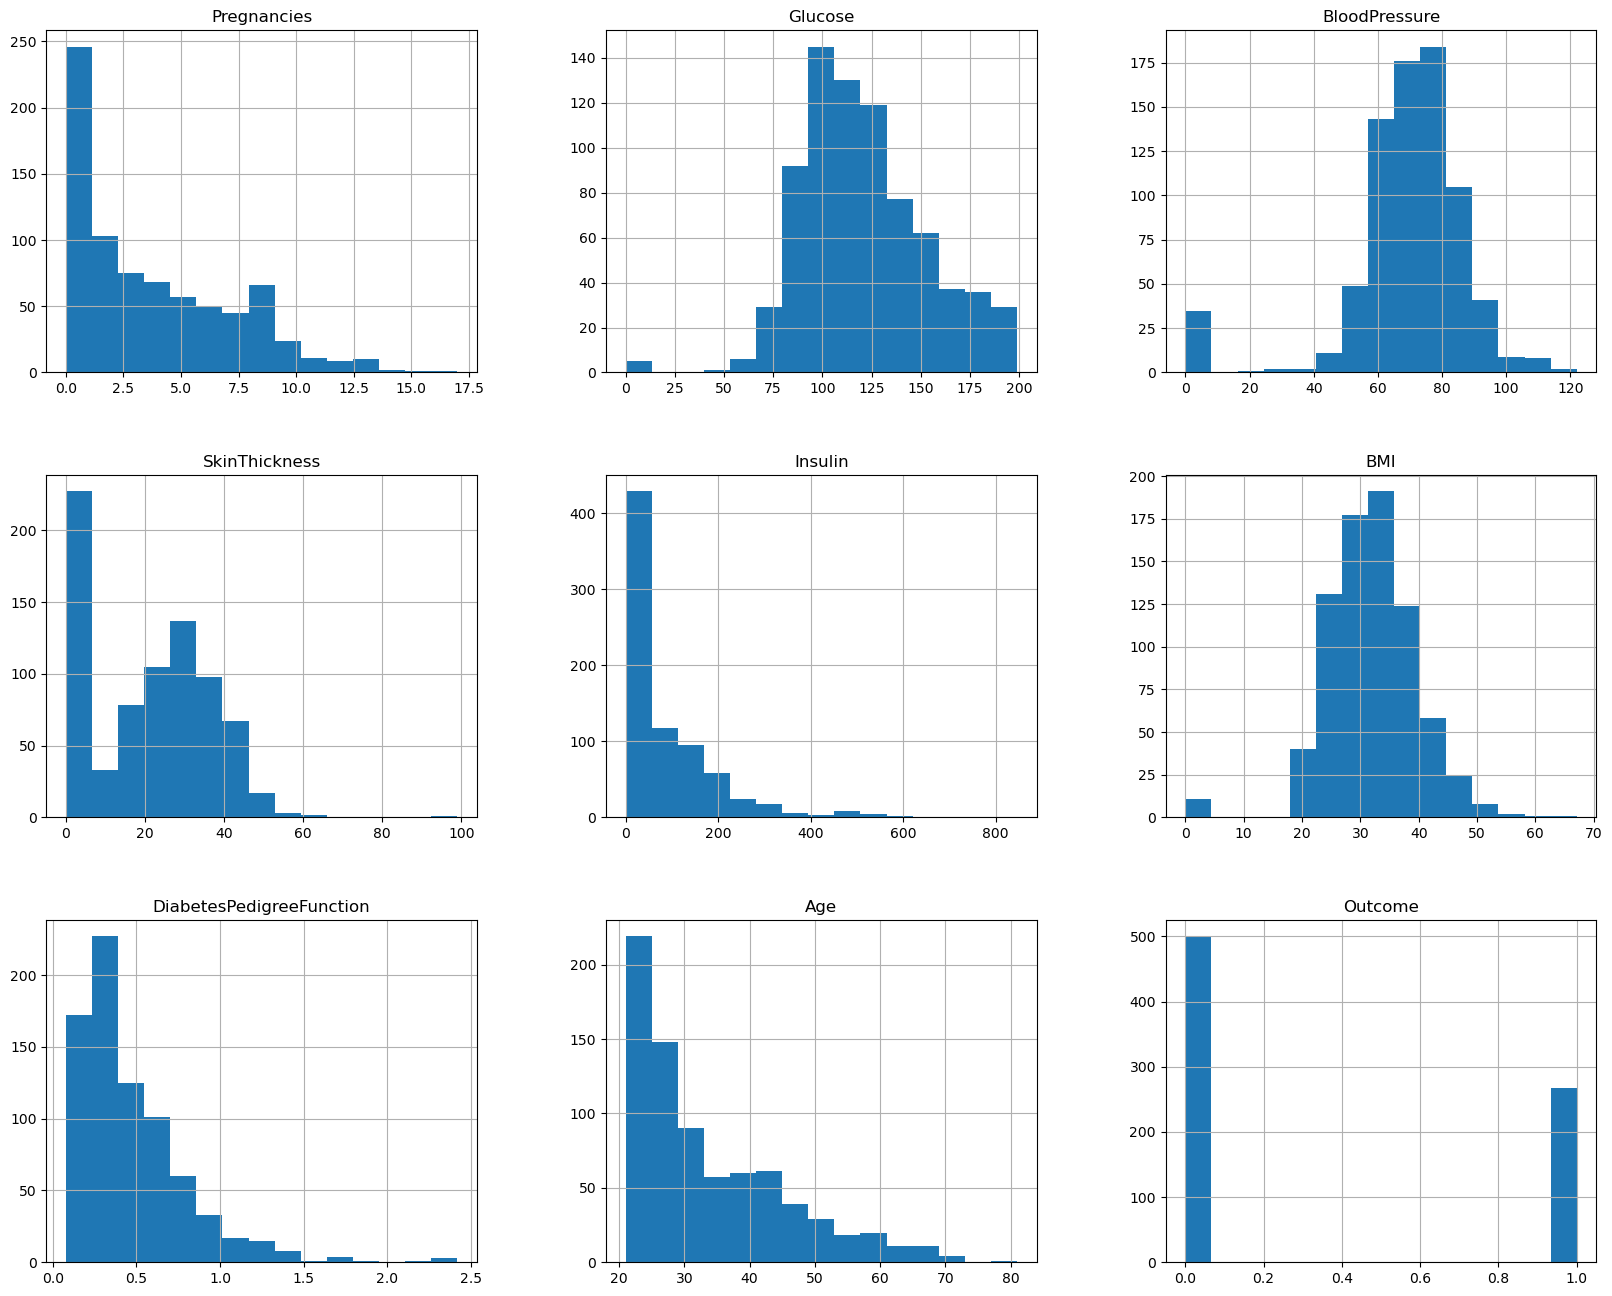

In [13]:
df.hist(bins=15, figsize=(20,16));

## 2. Estatísticas descritivas iniciais

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Verificando valores ausentes ou inválidos
Na base, alguns campos têm o valor **0** que pode indicar ausência de medição (por exemplo, pressão arterial = 0). Vamos verificar esses casos.

In [ ]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    print(f"{col} - Total de zeros: { (df[col] == 0).sum() }")

Glucose - Total de zeros: 5
BloodPressure - Total de zeros: 35
SkinThickness - Total de zeros: 227
Insulin - Total de zeros: 374
BMI - Total de zeros: 11


In [16]:
# Substituindo zeros por NaN e contando os valores ausentes
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## 4. Imputação de valores ausentes com a mediana (Usar com atenção)

In [17]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

#Remover dados nulos
#df.dropna(inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 6. Visualizando distribuições e outliers

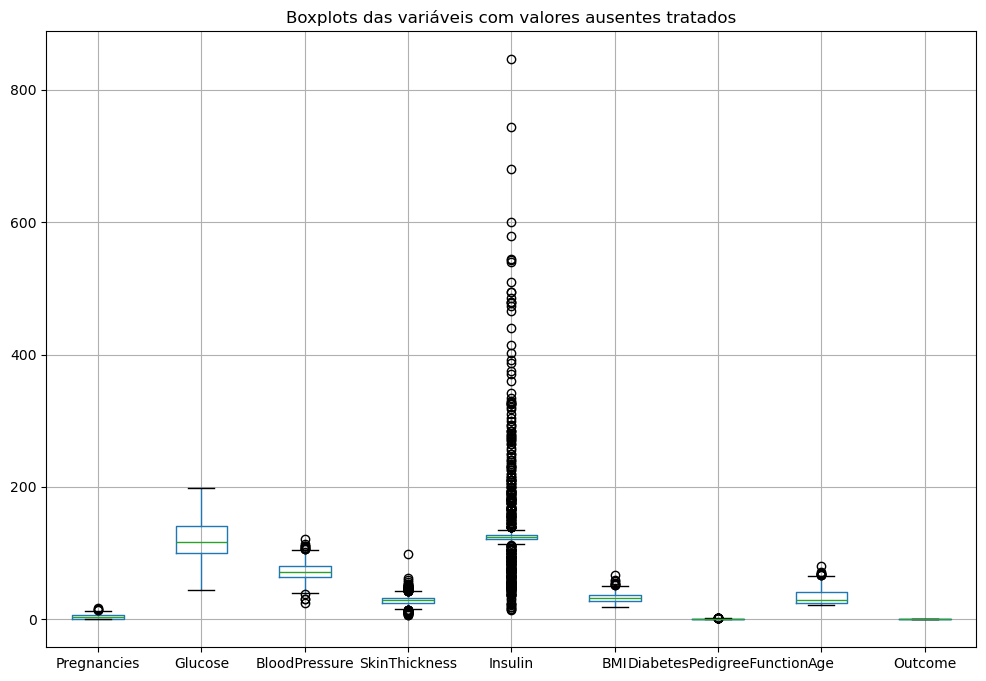

In [18]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplots das variáveis com valores ausentes tratados")
plt.show()

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## O que é IQR (Interquartile Range)?

O **IQR**, ou **Intervalo Interquartil**, é uma medida estatística de dispersão que descreve a faixa central de um conjunto de dados. Ele é útil especialmente para detectar **valores discrepantes (outliers)**, pois é **resistente a valores extremos**.

O IQR é calculado como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1):

\[
**IQR** = Q3 - Q1
\]

- **Q1 (1º Quartil)**: 25% dos dados estão abaixo desse valor.
- **Q3 (3º Quartil)**: 75% dos dados estão abaixo desse valor.
- **IQR** representa os 50% centrais dos dados.

---

## Como interpretar o IQR?

O IQR serve como base para identificar possíveis **outliers**. Valores são considerados outliers se estiverem **muito abaixo de Q1 ou muito acima de Q3**, fora do intervalo definido por:

- **Limite Inferior**:  
  \[
  Q1 - 1.5 * IQR
  \]
- **Limite Superior**:  
  \[
  Q3 + 1.5 * IQR
  \]

Qualquer dado que esteja **fora desses limites** é considerado um possível outlier.

---

## Vantagens do uso do IQR

- **Não depende da distribuição dos dados** (diferente do uso de média e desvio padrão).
- **Menos sensível a valores extremos**, tornando-o mais robusto.


In [19]:
def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_insulin = detectar_outliers_iqr('Insulin')

print(outliers_insulin)

#remover outliers
#df = df.drop(outliers_insulin.index)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

# Questão

- Devo remover os outliers?